In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from swiftascmaps import red
from matplotlib.pyplot import imshow
from numpy import random

# download nltk corpus (first time only)
#nltk.download('all')


# Evermore

In [12]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/09-evermore_deluxe_version.csv')
df.head()

,album_name,track_title,track_n,lyric,line
0,evermore (deluxe version),willow,1,I'm like the water when your ship rolled in th...,1
1,evermore (deluxe version),willow,1,"Rough on the surface, but you cut through like...",2
2,evermore (deluxe version),willow,1,And if it was an open-shut case,3
3,evermore (deluxe version),willow,1,I never would've known from that look on your ...,4
4,evermore (deluxe version),willow,1,Lost in your current like a priceless wine,5


In [13]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='swift.evermore',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,album_name,object,0,0.000000
1,track_title,object,0,0.000000
2,track_n,int64,0,0.000000
3,lyric,object,0,0.000000
4,line,int64,0,0.000000


In [4]:
df.columns

Index(['album_name', 'track_title', 'track_n', 'lyric', 'line'], dtype='object')

In [5]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

album_name: 1 distinct values
track_title: 17 distinct values
track_n: 17 distinct values
lyric: 640 distinct values
line: 69 distinct values


In [6]:
df['track_title'].value_counts()

​l​ong story short           69
​ivy                         64
​happiness                   64
​coney island                61
​r​ight where you left me    60
​evermore                    60
cowboy like me               60
​marjorie                    56
willow                       55
​it’s time to go             54
​’tis the damn season        52
champagne problems           51
​no body, no crime           51
​gold rush                   42
​tolerate it                 41
​closure                     39
​dorothea                    33
Name: track_title, dtype: int64

In [7]:
analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['lyric', 'Vader_Score', 'Sentiment']].head())

                                               lyric  Vader_Score Sentiment
0  I'm like the water when your ship rolled in th...       0.3612  positive
1  Rough on the surface, but you cut through like...       0.1531  positive
2                    And if it was an open-shut case       0.0000   neutral
3  I never would've known from that look on your ...       0.0000   neutral
4         Lost in your current like a priceless wine       0.0516  positive


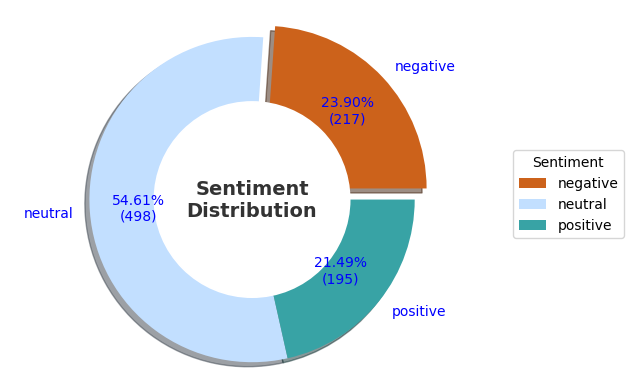

In [8]:

colors = ['#cc621b', '#c2dfff', '#38a3a5']

explode = (0.1, 0, 0)  

sentiment_counts = df.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="b"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

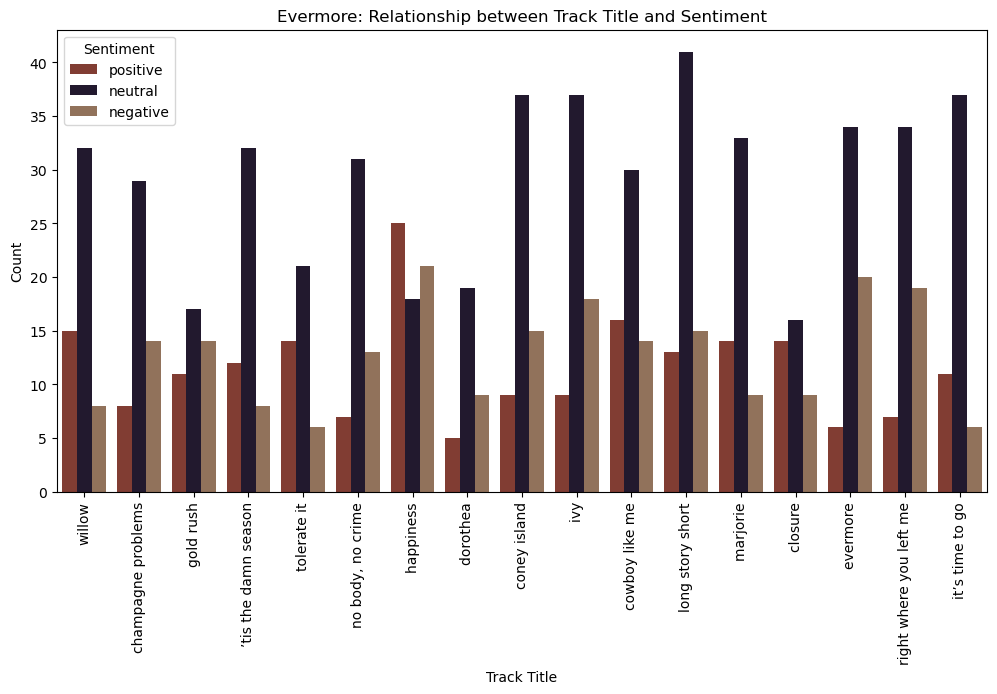

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.evermore')
plt.title('Evermore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Lover 🩵

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/07-lover.csv')
df.head()

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

In [ ]:
df['track_title'].value_counts()

In [ ]:
df[df['track_title'] == 'I Think He Knows']

In [ ]:
analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['lyric', 'Vader_Score', 'Sentiment']].head())

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.lover')
plt.title('Lover: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["clean_lyrics"] = df["lyric"].apply(clean)

In [ ]:
from collections import Counter

df['temp_list'] = df['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='swift.lover')

In [ ]:
top = Counter([item for sublist in df[df['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='swift.lover')

# Reputation 🖤

In [ ]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/06-reputation.csv')
df.head()

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))
print(df[['lyric', 'Vader_Score', 'Sentiment']].head())

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='swift.reputation')
plt.title('Reputation: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 1989

In [14]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/05-1989_deluxe.csv')
df.head()

,album_name,track_title,track_n,lyric,line
0,1989 (Deluxe),Welcome to New York,1,"Walking through a crowd, the village is aglow",1
1,1989 (Deluxe),Welcome to New York,1,Kaleidoscope of loud heartbeats under coats,2
2,1989 (Deluxe),Welcome to New York,1,Everybody here wanted something more,3
3,1989 (Deluxe),Welcome to New York,1,Searching for a sound we hadn't heard before,4
4,1989 (Deluxe),Welcome to New York,1,And it said,5
